## Covid-19 Statistics using Python

by H. Knospe

In [1]:
import numpy as np
import scipy.integrate as sci
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import ScalarFormatter

In [2]:
# Get data from Github
# Data Repository by Johns Hopkins CSSE
# re-run daily to get up-to-date information
# url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
# new
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url, error_bad_lines=False)


In [3]:
# last available date
last_date=confirmed.columns[confirmed.columns.size-1]
print(last_date)

12/3/21


In [4]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum()

In [5]:
ccs=confirmedcountry.sort_values(by=last_date, ascending=False)

In [6]:
print('Total Number of Cases until '+last_date+":") 
print(ccs[['Country/Region',last_date]].head(15).to_string(index=False, float_format='%8.0f'))

Total Number of Cases until 12/3/21:
 Country/Region   12/3/21
             US  48990127
          India  34624360
         Brazil  22129409
 United Kingdom  10438381
         Russia   9565909
         Turkey   8863356
         France   7927361
        Germany   6134492
           Iran   6129199
      Argentina   5337692
          Spain   5202958
          Italy   5077445
       Colombia   5076378
      Indonesia   4257243
         Mexico   3897452


In [7]:
# Deaths
deathcountry=death.groupby("Country/Region", as_index=False).sum()
dcs=deathcountry.sort_values(by=last_date, ascending=False)
print('Deaths until '+last_date+":") 

print(dcs[['Country/Region',last_date]].head(15).to_string(index=False, float_format='%5.0f'))

Deaths until 12/3/21:
 Country/Region  12/3/21
             US   787695
         Brazil   615400
          India   470530
         Mexico   294904
         Russia   273463
           Peru   201326
 United Kingdom   145874
      Indonesia   143858
          Italy   134077
           Iran   130066
       Colombia   128685
         France   120440
      Argentina   116639
        Germany   102951
        Ukraine    92960


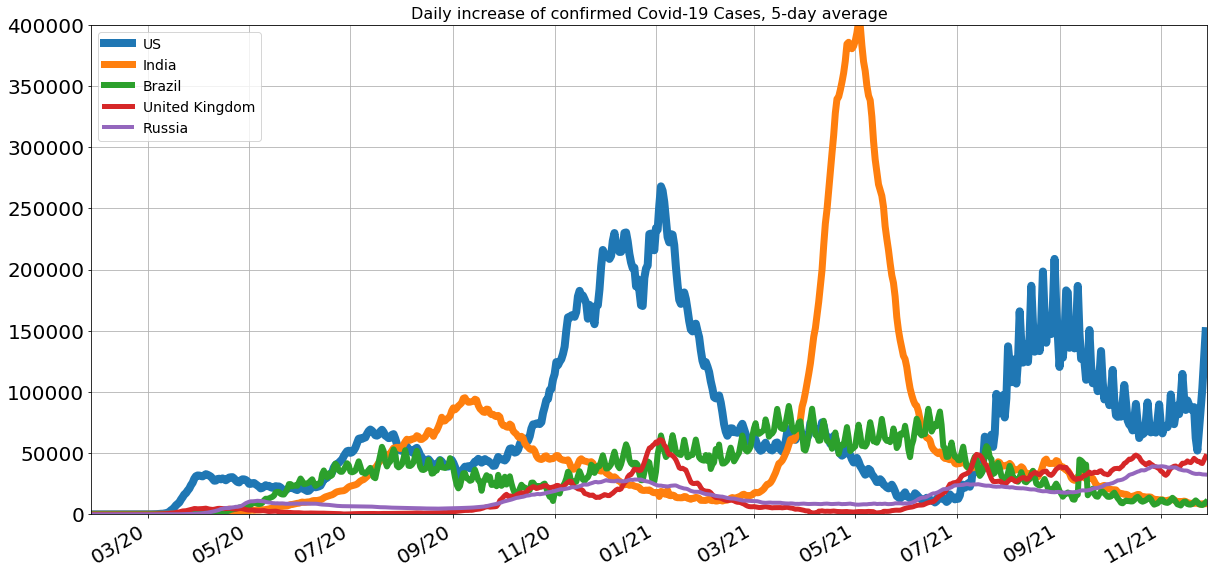

In [9]:
zerodate = datetime.datetime(2020, 1, 22)
d = confirmed.columns.size-9
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(20, 10)) 
i=1
countries=ccs['Country/Region'].values
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,8:][0]
    dscdata=ccs.loc[ccs['Country/Region']==country].values[:,3:d+3][0]
    dscdata=(scdata-dscdata)/5                   #np.diff(scdata)
    #ax.set_yscale('log')
    ax.plot(date0,dscdata, label='%s' % country, linewidth=9-i)
    myFmt = DateFormatter("%m/%y")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.set_ylim(bottom=0)  
    ax.set_ylim(top=400000)  
    ax.legend(loc='upper left',fontsize=14)
    ax.set_xlim(zerodate + datetime.timedelta(days=5), zerodate + datetime.timedelta(days=d))
    ax.tick_params(labelsize=20)
    ax.set_title('Daily increase of confirmed Covid-19 Cases, 5-day average',fontsize=16)
    ax.grid()
    i=i+1
plt.show()

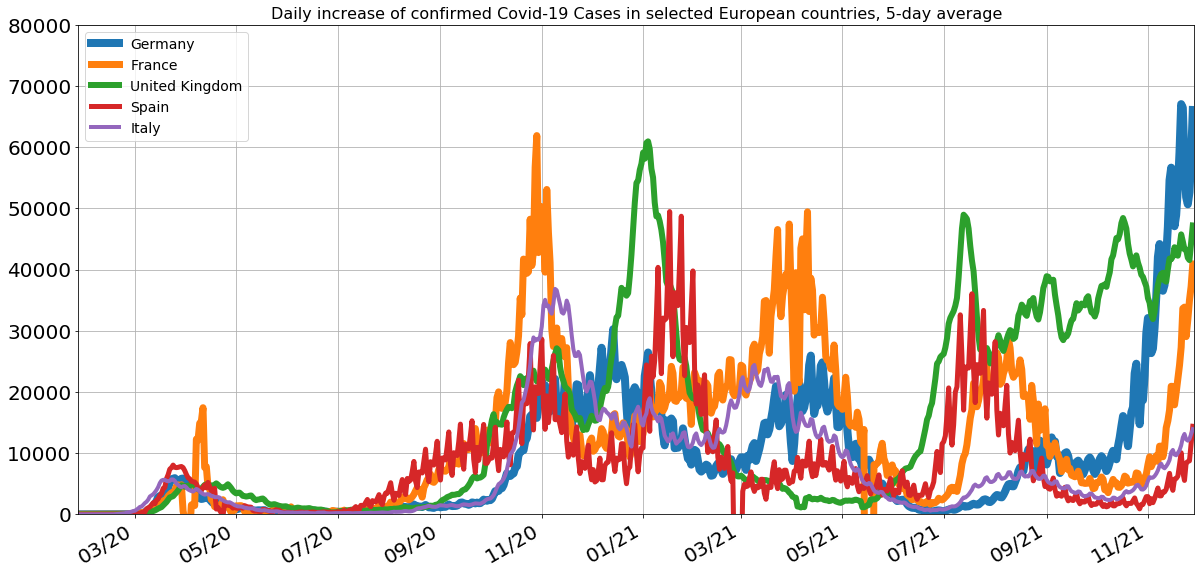

In [10]:
#eu_countries=['Spain','France','United Kingdom','Italy','Germany','Netherlands','Belgium','Austria','Ireland']
eu_countries=['Germany','France','United Kingdom','Spain','Italy']
zerodate = datetime.datetime(2020, 1, 22)
d = confirmed.columns.size-9
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(20, 10)) 
i=1
for country in eu_countries:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,8:][0]
    dscdata=ccs.loc[ccs['Country/Region']==country].values[:,3:d+3][0]
    dscdata=(scdata-dscdata)/5                   #np.diff(scdata)
    #ax.set_yscale('log')
    ax.plot(date0,dscdata, label='%s' % country, linewidth=9-i)
    myFmt = DateFormatter("%m/%y")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.set_ylim(bottom=0)  
    ax.set_ylim(top=80000)  
    ax.legend(loc='upper left',fontsize=14)
    ax.set_xlim(zerodate + datetime.timedelta(days=5), zerodate + datetime.timedelta(days=d))
    ax.tick_params(labelsize=20)
    ax.set_title('Daily increase of confirmed Covid-19 Cases in selected European countries, 5-day average',fontsize=16)
    ax.grid()
    i=i+1
#plt.savefig("increase-europe.png",bbox_inches='tight',pad_inches=1,dpi=300)    
plt.show()